In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tdmsdata import TdmsData
import numpy as np
from scipy.optimize import curve_fit
from statistics import mean
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d


In [3]:
# inputs
file = '20231124_0955_Sn_118_res_scan.tdms'
channel = 1

In [4]:
# raw data to dataset (run once)
TDMS = TdmsData(''.join(['/Users/xnimir/Desktop/Sn exp/Week47_17-11-2023/Isotope shift/{}'.format(file)]))

raw_data = TDMS.get_raw_data(''.join(['Channel ', str(channel)])) # 2D np array

dataset = pd.DataFrame({'Cycle': raw_data[:, 0], 'Time(sec)': raw_data[:, 1], 'Wavelength (nm)': raw_data[:, 2]}) # raw data in pd dataframe 


In [5]:
wavelengths = dataset['Wavelength (nm)']
cycle = dataset['Cycle']
no_of_cycles = int(dataset["Cycle"].max())
cycles = np.linspace(1,no_of_cycles, no_of_cycles)
time = dataset["Time(sec)"]
# grouped_data = dataset.groupby('Cycle')

# for Sn-122, cuts last cycle bc magnet was changed too early
newcycle = dataset[cycle.between(0,1)] 
wavelengths_new = newcycle['Wavelength (nm)']
sep_time_sn122 = newcycle["Time(sec)"]

1534.2081955
0.00021800000013172394
0.00021799999990435026
1245.0


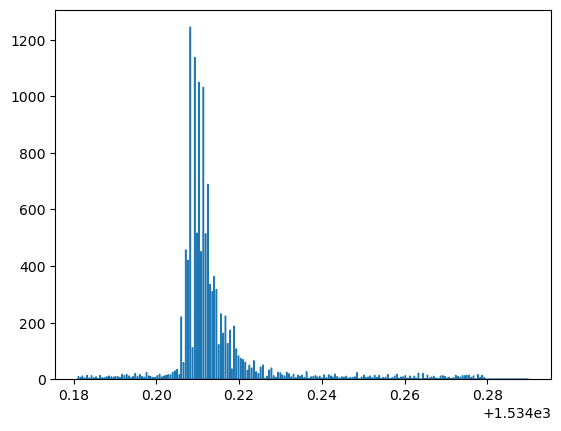

In [36]:
# plot together 
fig, wl_hist = plt.subplots(1, 1)

(counts, bins, vals) = wl_hist.hist(
    wavelengths, # change to wavelengths_new for Sn-122
    # wavelengths_new,
    bins=1000,
    range=(1534.181, 1534.29),
    # range = (38000, 42000),
    log = False, 
    histtype='step',
)

# Calculate bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

interp_func = interp1d(bin_centers, counts, kind='cubic')  # Use cubic spline interpolation
smooth_bin_centers = np.linspace(bin_centers.min(), bin_centers.max(), 1000)  # Generate more points for smoother curve
smooth_counts = interp_func(smooth_bin_centers)

# # Plot the smoothed line
# wl_hist.plot(smooth_bin_centers, smooth_counts, color='blue', linestyle='-', linewidth=2, label='Smoothed Outline')
  
# plt.xlabel('WL')
# plt.ylabel('Counts')
# # plt.title(f'{file}, {x}')
# # plt.title('Sn-119')
# plt.show()

# plt.xlabel('Wavelength (nm)')
# plt.ylabel('Counts')
# plt.title(f'{file}')
# plt.show()

max_count = max(counts)
max_index = counts.tolist().index(max_count)
max_wavelength = (bins[max_index] + bins[max_index + 1]) / 2  # Midpoint of the bin
print(max_wavelength)

half_max = max_count / 2

left_idx = np.where(counts[:max_index] <= half_max)[0][-1]  # Left side
right_idx = np.where(counts[max_index:] <= half_max)[0][0] + max_index  # Right side

# Get the corresponding wavelength (midpoint of the bin) at this index
left_wavelength = (bins[left_idx] + bins[left_idx + 1]) / 2
peak_wavelength = (bins[max_index] + bins[max_index + 1]) / 2
right_wavelength = (bins[right_idx] + bins[right_idx + 1]) / 2

# Calculate left-side HWHM
left_HWHM = peak_wavelength - left_wavelength

fwhm_est = left_HWHM * 2
FWHM = right_wavelength - left_wavelength

print(fwhm_est)
print(FWHM)
print(max_count)



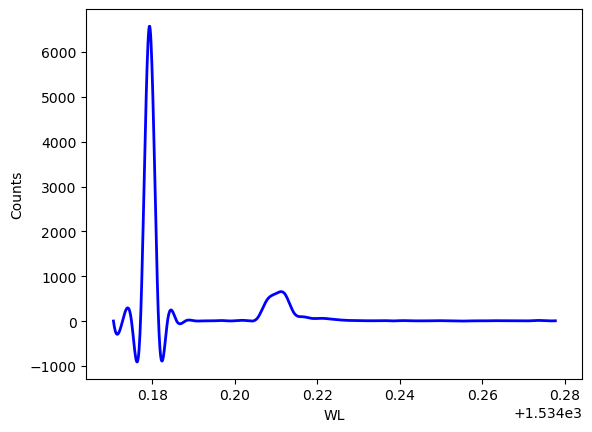

In [8]:
fig, wl_hist = plt.subplots(1, 1)

(counts, bins, vals) = wl_hist.hist(
    # sep_time, # change to wavelengths_new for Sn-122
    sep_wl,
    # wavelengths_new,
    bins=50,
    # range=(1534.181, 1534.28),
    log = False, 
    histtype='step',
    color = 'white'
)

# vertical_lines_x = [1534.215, 1534.222]  
# vertical_lines_x = [42,46.5]


# Calculate bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

interp_func = interp1d(bin_centers, counts, kind='cubic')  # Use cubic spline interpolation
smooth_bin_centers = np.linspace(bin_centers.min(), bin_centers.max(), 1000)  # Generate more points for smoother curve
smooth_counts = interp_func(smooth_bin_centers)

# Plot the smoothed line
wl_hist.plot(smooth_bin_centers, smooth_counts, color='blue', linestyle='-', linewidth=2, label='Smoothed Outline')

# Save counts, bins, and bin_centers to a file
# np.savez('sn122.npz', counts=smooth_counts, bins=bins, bin_centers=smooth_bin_centers)

    
plt.xlabel('WL')
plt.ylabel('Counts')
# plt.title(f'{file}, {x}')
# plt.title('Sn-119')
plt.show()

In [25]:
def nmtoMHz(wl):
    c = 3e8 
    v = c / (wl * 1e-9)
    return v/1e6

In [9]:
def doppler_shift(wavelengths):
    import doppler_shift
    import importlib
    importlib.reload(doppler_shift)

    # shifted_vals = {}

    # for key, item in noshift.items():
    #     isotope = int(''.join(filter(str.isdigit, key)))
    #     shift = doppler_shift.getshift(item,isotope)
    #     shifted_vals.update({key: shift})

    # print(shifted_vals)

    # return shifted_vals
  
    isotope = 116
    shifted_wls = doppler_shift.getshift(wavelengths, isotope)
    return shifted_wls

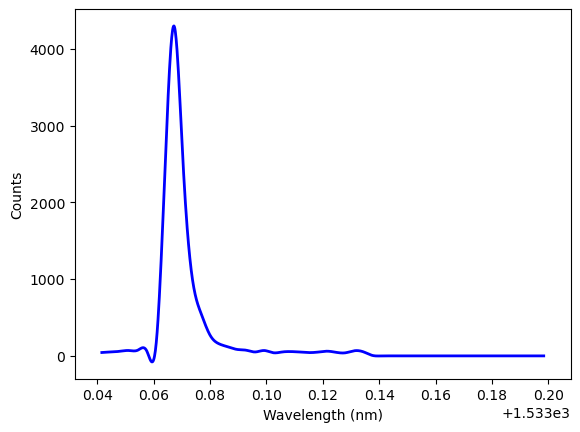

1533.067183983984


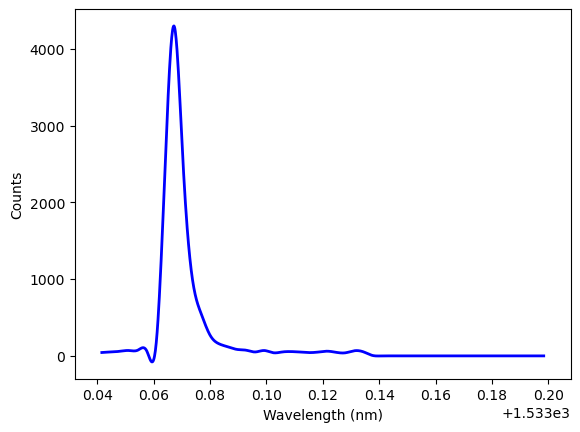

1533.067183983984


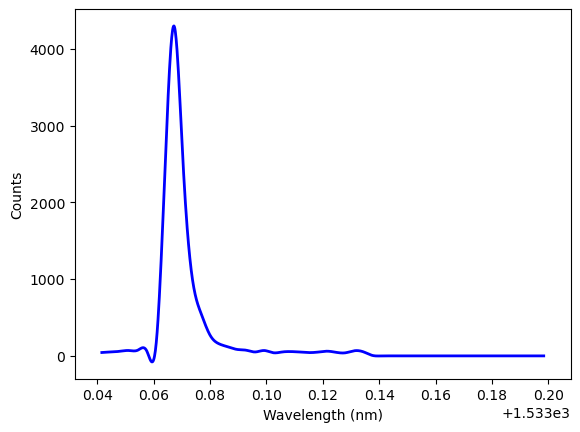

1533.067183983984


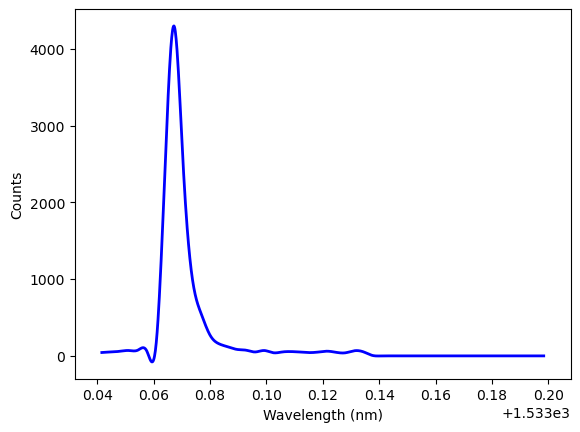

1533.067183983984


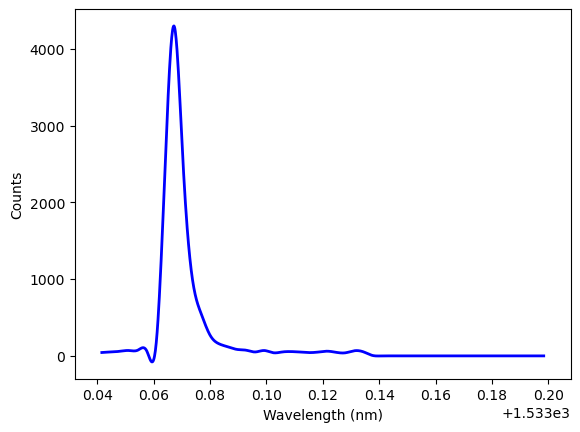

1533.067183983984


In [10]:
for x in cycles:
    shifted_wls = doppler_shift(wavelengths)
    dataset['Doppler shifted wl'] = shifted_wls

    fig, wl_hist = plt.subplots(1, 1)

    (counts, bins, vals) = wl_hist.hist(
        shifted_wls, 
        # wavelengths,
        bins=50,
        # range=(1534.181, 1534.28),
        range = (1533.04, 1533.20), 
        log = False, 
        histtype='step',
        color = 'white'
    )

    # Calculate bin centers
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    interp_func = interp1d(bin_centers, counts, kind='cubic')  # Use cubic spline interpolation
    smooth_bin_centers = np.linspace(bin_centers.min(), bin_centers.max(), 1000)  # Generate more points for smoother curve
    smooth_counts = interp_func(smooth_bin_centers)

    # Plot the smoothed line
    wl_hist.plot(smooth_bin_centers, smooth_counts, color='blue', linestyle='-', linewidth=2, label='Smoothed Outline')

    # np.savez('sn124_shift.npz', counts=smooth_counts, bins=bins, bin_centers=smooth_bin_centers)
        
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Counts')
    # plt.title(f'{file}, {x}')
    # plt.title('Sn-119')
    plt.show()


    max_index = np.argmax(smooth_counts)
    max_wl = smooth_bin_centers[max_index]
    print(max_wl)



In [23]:
# plot by cycle
def cyclesep():
    max_wls = []
    max_counts = []

    for x in cycles:
        separated = dataset.loc[dataset['Cycle']==x]
        sep_wl = separated['Wavelength (nm)']
        sep_time = separated['Time(sec)']


        fig, wl_hist = plt.subplots(1, 1)

        (counts, bins, vals) = wl_hist.hist(
            sep_wl, # change to wavelengths_new for Sn-122
            # wavelengths_new,
            bins=1000,
            range=(1534.181, 1534.29),
            log = False, 
            histtype='step',
        )
        
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Counts')
        plt.title(f'{file}, {x}')
        plt.show()

        # max_index = np.argmax(counts)

        # # Access the corresponding y value
        # max_y_value = counts[max_index]


        # max_wls.append(float(bins[np.where(counts == counts.max())]))
        # max_counts.append(max_y_value)
        # # print(separated)
        # print(bins[np.where(counts == counts.max())])
        # print(max_y_value)

In [12]:
#sn-120 
sn120_val = np.mean([1533.0767583583583, 1533.0761305305305, 1533.0767583583583, 1533.0766014014014, 
 1533.0767583583583, 1533.0766014014014, 1533.0759735735735])

print(sn120_val)

sn120_freq = nmtoMHz(sn120_val)
print(sn120_freq)

1533.0765117117116
195684949.6474535


In [13]:
# # List of filenames to load
# filenames = ['sn116_shift.npz', 'sn118_shift.npz', 'sn120_shift.npz', 'sn122_shift.npz', 'sn124_shift.npz']  
# # filenames = ['sn117.npz', 'sn119.npz']

# fig, wl_hist = plt.subplots(1, 1)
# colors = ['red', 'orange', 'green', 'blue', 'purple']
# # colors = ['red', 'blue']

# # Load and plot data from each file
# for i, filename in enumerate(filenames):
#     data = np.load(filename)
#     counts = data['counts']
#     bins = data['bins']
#     bin_centers = data['bin_centers']

#     color = colors[i % len(colors)]  # Cycle through the list of colors
#     wl_hist.plot(bin_centers, counts, color=color, linewidth=2, label=f'Sn-{116 + 2 * i}')

# # wl_hist.set_yscale('log')

# plt.xlabel('Wavelengths', size=16)
# plt.ylabel('Counts', size=16)
# # plt.ylim(0,700)
# # plt.xlim(1533.04, 1533.14)
# plt.legend()
# plt.show()


In [14]:
def gaussian(x, amplitude, mean, std_dev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * std_dev**2))

1534.2020000000002
1534.2020000000002
1534.2020000000002
1534.2051999999999
1534.2020000000002


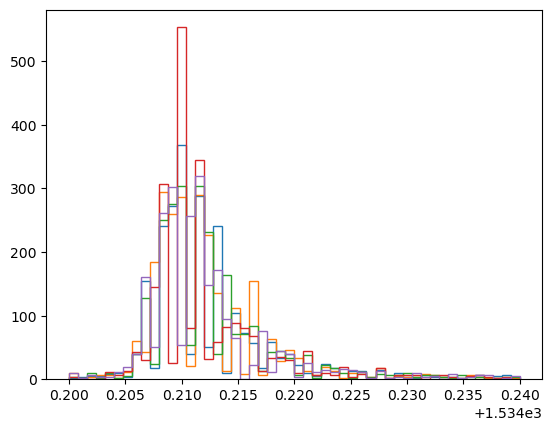

In [15]:
delta_vs = []
for x in cycles:
    separated = dataset.loc[dataset['Cycle'] == x]
    sep_wl = separated['Wavelength (nm)']

    counts, bins, _ = plt.hist(
        # selected_data,
        sep_wl,
        bins=50,
        range=(1534.20, 1534.24),
        log=False,  
        histtype='step',
    )
    # counts = np.maximum(counts, 1e-10) # for log to remove 0s 

    bin_centers = (bins[:-1] + bins[1:]) / 2

    # initial_params = [np.max(counts), np.mean(bin_centers), np.std(bin_centers)]
    initial_params = [300, 1534.22, 0.001]
    params, covariance = curve_fit(gaussian, bin_centers, counts, p0=initial_params, maxfev=50000)
    # print(params)

    # plt.xlabel('Wavelength (nm)')
    # plt.ylabel('Counts')
    # plt.title(f'{file}, {x}')
    # plt.plot(bin_centers, gaussian(bin_centers, *params), 'r', label='Gaussian Fit')
    # plt.legend()
    # plt.show()

    half_max_amplitude = params[0] / 2
    half_max_points = bin_centers[np.where(gaussian(bin_centers, *params) >= half_max_amplitude)]
    fwhm = np.abs(half_max_points[-1] - half_max_points[0])
    print(half_max_points[0]-fwhm)

    c = 3e8 
    lambda_0 = params[1]
    v_start = c / ((lambda_0 + (fwhm / 2)) * 1e-9)
    v_stop = c / ((lambda_0 - (fwhm / 2)) * 1e-9)
    delta_v = (v_stop - v_start) * 1e-6 # MHz 
    # print(delta_v)
    delta_vs.append(delta_v)

# print(delta_vs)

sn120: 637 MHz 
sn116: 310 MHz
ssn118: 679 MHz 
sn120_3: 509 MHz 

In [16]:
print(max_wls)
print(max_counts)

[]
[]


In [17]:
noshift = {
    'sn120': [1534.22024, 1534.21915, 1534.21806, 1534.21806, 1534.21915,
              1534.217624, 1534.218714, 1534.218714, 1534.217624, 1534.217624,
              1534.21806, 1534.21806, 1534.21806, 1534.21806, 1534.21806,
              1534.218714, 1534.21806, 1534.21806, 1534.219804, 1534.217624,
              1534.218714, 1534.21806, 1534.218714, 1534.21806, 1534.218714,
              1534.21806, 1534.21806, 1534.21806, 1534.218714, 1534.218714,
              1534.219804, 1534.217624, 1534.219804, 1534.217624, 1534.217624],
    'sn116': [1534.200184, 1534.199094, 1534.19953, 1534.19953, 1534.19953],
    'sn118': [1534.210212, 1534.209122, 1534.209122, 1534.211738, 1534.209122],
    'sn122': [1534.227652, 1534.227216, 1534.226562, 1534.227652],
    'sn124': [1534.235718, 1534.235718, 1534.236808, 1534.236154, 1534.236154],
    }

counts = {
    'sn120': [274.0, 324.0, 333.0, 256.0, 266.0, 
              245.0, 305.0, 258.0, 271.0, 292.0,
              277.0, 313.0, 254.0, 280.0, 317.0,
              269.0, 353.0, 361.0, 259.0, 296.0,
              426.0, 281.0, 288.0, 340.0, 283.0, 
              380.0, 405.0, 348.0, 336.0, 314.0,
              288.0, 377.0, 278.0, 343.0, 263.0],         
    'sn116': [171.0, 133.0, 120.0, 125.0, 137.0], 
    'sn118': [312.0, 260.0, 276.0, 325.0, 303.0], 
    'sn122': [51.0, 69.0, 50.0, 56.0],
    'sn124': [63.0, 40.0, 75.0, 75.0, 76.0]
}

counts_norm_beam_sn120_1 = list(counts['sn120'][:5] / np.array(7.91))
counts_norm_beam_sn120_2 = list(counts['sn120'][5:10] / np.array(10.18))
counts_norm_beam_sn120_3 = list(counts['sn120'][10:15] / np.array(10))
counts_norm_beam_sn120_4 = list(counts['sn120'][15:20] / np.array(10))
counts_norm_beam_sn120_5 = list(counts['sn120'][20:25] / np.array(10))
counts_norm_beam_sn120_6 = list(counts['sn120'][25:30] / np.array(10))
counts_norm_beam_sn120_7 = list(counts['sn120'][30:35] / np.array(10))
counts_norm_beam_sn116 = list(counts['sn116'] / np.array(3.5))
counts_norm_beam_sn118 = list(counts['sn118'] / np.array(10))
counts_norm_beam_sn122 = list(counts['sn122'] / np.array(10))
counts_norm_beam_sn124 = list(counts['sn124'] / np.array(10))

In [18]:
# # plot counts vs wl 
# shifted_vals = doppler_shift()

# plt.scatter(shifted_vals['sn116'], counts_norm_beam_sn116, color = 'red', label = 'Sn-116')
# plt.scatter(shifted_vals['sn118'], counts_norm_beam_sn118, color = 'orange', label = 'Sn-118')
# plt.scatter(shifted_vals['sn120'][:5], counts_norm_beam_sn120_1, color = 'green', label = 'Sn-120')
# plt.scatter(shifted_vals['sn120'][5:10], counts_norm_beam_sn120_2, color = 'green')
# plt.scatter(shifted_vals['sn120'][10:15], counts_norm_beam_sn120_3, color = 'green')
# plt.scatter(shifted_vals['sn120'][15:20], counts_norm_beam_sn120_4, color = 'green')
# plt.scatter(shifted_vals['sn120'][20:25], counts_norm_beam_sn120_5, color = 'green')
# plt.scatter(shifted_vals['sn120'][25:30], counts_norm_beam_sn120_6, color = 'green')
# plt.scatter(shifted_vals['sn120'][30:35], counts_norm_beam_sn120_7, color = 'green')

# plt.scatter(shifted_vals['sn122'], counts_norm_beam_sn122, color = 'blue', label = 'Sn-122')
# plt.scatter(shifted_vals['sn124'], counts_norm_beam_sn124, color = 'purple', label = 'Sn-124')

# plt.xlabel('Wavelength (nm)')
# plt.ylabel('Normalized counts')

# plt.legend()
# plt.show

In [19]:
keys_to_avg = ['sn116', 'sn118', 'sn120', 'sn122', 'sn124']
avg_by_key = {key: mean(shifted_vals[key]) for key in keys_to_avg}
# std_by_key = {key: np.std(shifted_vals[key]) for key in keys_to_avg}

# plt.scatter(116, avg_by_key['sn116'], color = 'red', label = 'Sn-116')
# plt.scatter(118, avg_by_key['sn118'], color = 'orange', label = 'Sn-118')
# plt.scatter(120, avg_by_key['sn120'], color = 'green', label = 'Sn-120')
# plt.scatter(122, avg_by_key['sn122'], color = 'blue', label = 'Sn-122')
# plt.scatter(124, avg_by_key['sn124'], color = 'purple', label = 'Sn-124')

lineary = (list(avg_by_key.values()))
linearx = [116, 118, 120, 122, 124]

# plt.errorbar(linearx, lineary, xerr=list(std_by_key.values()), fmt = 'none', capsize=5, capthick=2, color = 'black')

coefficients = np.polyfit(linearx, lineary, 1)
fit_line = np.poly1d(coefficients)

fit_y = fit_line(linearx)

# plt.plot(linearx, fit_y, label = 'Linear', linestyle = 'dotted', color = 'black')

coefs_quadratic = np.polyfit(linearx, lineary, 2)
quadratic_func = np.poly1d(coefs_quadratic)
fit_x_quad = np.linspace(min(linearx), max(linearx), 100)
fit_y_quad = quadratic_func(fit_x_quad) 

# plt.plot(fit_x_quad, fit_y_quad, label = 'Quadratic')

# plt.xlabel('Atomic number')
# plt.ylabel('Avg. λ')

# plt.legend()
# # plt.show

y_linear_pred = np.polyval(fit_line, linearx)
y_quadratic_pred = np.polyval(quadratic_func, linearx)

r2_linear = r2_score(lineary, y_linear_pred)
r2_quadratic = r2_score(lineary, y_quadratic_pred)

print(r2_linear, r2_quadratic)


NameError: name 'shifted_vals' is not defined

change energy in doppler shift calculation and compare center frequency shift 
at 120 
and 118 
half width of line 
difference of shift is smaller than width of line and if so then the energy difference of beam in negligable 

plot isotopes on x axis, energy - doppler on y axis 
possible shell closure at 120 